In [17]:
import numpy as np
import scipy.sparse as sp
import graphviz

In [18]:
# load graph.
nodes = np.array([['1', 0, 'import numpy as np'],
                  ['23', 0, 'import pandas'],
                  ['78', 0, 'f.close()'],
                  ['2', -1, 'from lib import net'],
                  ['10', 1, 'from libs import nets'],
                  ['22', 0, 'def main():'],
                  ['7', 0, 'd = dict()'],
                  ['66', 0, 'import gnn'],
                  ['8', 0, 'print("Hello")'],
                  ['15', 0, 'return ret']], dtype=object)
edges = np.array([['1', '23', 'CDG', 0],
                  ['23', '2', 'DDG', -1],
                  ['7', '78', 'DDG', 0],
                  ['23', '10', 'DDG', 1],
                  ['2', '22', 'DDG', -1],
                  ['10', '22', 'DDG', 1],
                  ['1', '66', 'CDG', 0],
                  ['10', '8', 'CDG', 1],
                  ['22', '7', 'CDG', 0],
                  ['8', '15', 'CDG', 0]], dtype=object)

In [19]:
# show graph.
def ShowGraph(nodes, edges, mask):
    colors = dict({-1: '#FF0000', 0: '#FFFFFF', 1: '#00FF00'})
    dot = graphviz.Digraph(comment='Example')
    for i, n in enumerate(nodes):
        dot.node(n[0], n[-1],
                 style='filled', 
                 fillcolor='#888888' if mask[i] else colors[n[1]])
    for e in edges:
        dot.edge(e[0], e[1])
    # display(dot)
    return dot

[0 0 0 1 1 0 0 0 0 0]


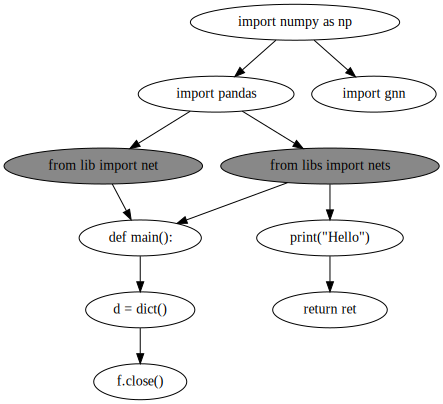

In [20]:
# get changed nodes mask.
mask = np.array([1 if ver else 0 for ver in nodes.T[1]])
print(mask)
ShowGraph(nodes, edges, mask)

In [21]:
def GraphSlicing(nodes, edges, mask, neighbor=1):
    # get node id dict.
    nodeIDs = dict((nID, idx) for idx, nID in enumerate(nodes.T[0]))
    # get the adjency matrix.
    nodesOut = [nodeIDs[n] for n in edges.T[0]]
    nodesIn = [nodeIDs[n] for n in edges.T[1]]
    A = sp.coo_matrix((np.ones(len(edges)), (nodesOut, nodesIn)), 
                      shape=(len(nodes), len(nodes)), dtype="float32")
    I = sp.eye(len(nodes)) # identity matrix.
    # calcualte total adjency matrix.
    M = I
    for h in range(1, neighbor+1):
        M += (A + A.T) ** h
    # calcualte the mask.
    _mask_ = np.array([1 if i else 0 for i in mask * M])

    return _mask_

[0 1 0 1 1 1 0 0 1 0]


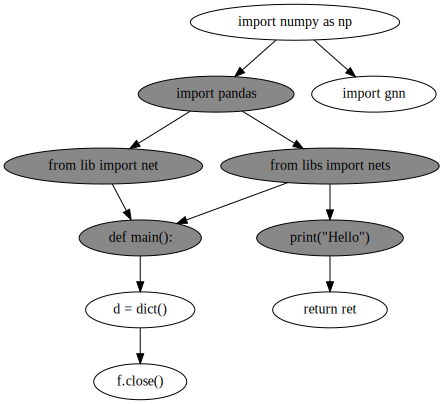

In [22]:
# 1-hop slicing
mask1 = GraphSlicing(nodes, edges, mask, 1)
print(mask1)
ShowGraph(nodes, edges, mask1)

[0 1 0 1 1 1 0 0 1 0]


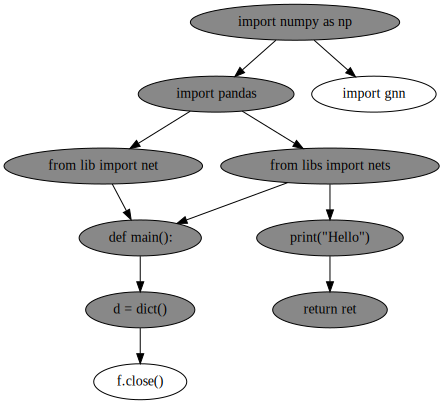

In [23]:
# 2-hop slicing.
mask2 = GraphSlicing(nodes, edges, mask, 2)
print(mask1)
ShowGraph(nodes, edges, mask2)

[1 1 1 1 1 1 1 1 1 1]


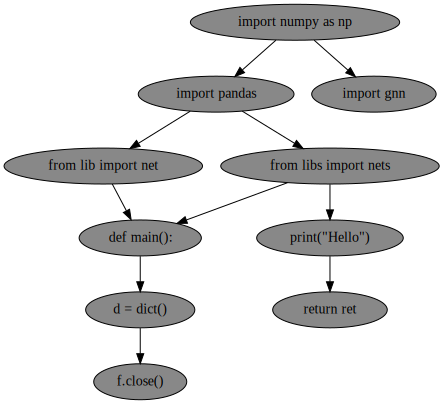

In [24]:
# 3-hop slicing.
mask3 = GraphSlicing(nodes, edges, mask, 3)
print(mask3)
ShowGraph(nodes, edges, mask3)